In [259]:
import pandas as pd
import numpy as np # linear algebra
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (3).json


{'kaggle.json': b'{"username":"yasjaber","key":"e40160d19145a1298f00d505daab0fcb"}'}

In [260]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [261]:
! kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany

apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [262]:
!unzip apartment-rental-offers-in-germany.zip

Archive:  apartment-rental-offers-in-germany.zip
replace immo_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [263]:
df = pd.read_csv('immo_data.csv')
dfOriginal = df.copy()

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [265]:
print(f'Number of columns is:',df.shape[1],'and rows is:',df.shape[0])

Number of columns is: 49 and rows is: 268850


(columns = {"regio1": "State", "regio2": "City", "regio3": "District"}, inplace = True)

### cleaning

In [266]:
##starting clock
import time
from time import clock
start_time = time.time()

In [267]:
df.dropna(subset=['totalRent'],inplace=True)

In [268]:
df = df.drop(df[df['totalRent'] == 0.0].index)
df = df.drop(df[df['totalRent'] < 0.0].index)
df = df.drop(df[df['livingSpace'] == 0.0].index)
df = df.drop(df[df['livingSpace'] < 0.0].index)

In [269]:
df = df.drop(df[df['yearConstructed'] >2022].index)
df = df.drop(df[df['baseRent'] < 0.0].index)

In [270]:
df.dropna(thresh=df.shape[0]*0.6,how='all',axis=1,inplace=True)

In [271]:
print(f'Number of columns is:',df.shape[1],'and rows is:',df.shape[0])

Number of columns is: 40 and rows is: 228039


In [272]:
dfnull = df.isna().sum()
dfnull = dfnull.sort_values(ascending=False)
dfnull

interiorQual            88733
numberOfFloors          79295
condition               56831
houseNumber             53899
streetPlain             53895
yearConstructedRange    49232
yearConstructed         49232
firingTypes             48365
facilities              44059
floor                   40334
heatingType             36797
typeOfFlat              30542
telekomUploadSpeed      28013
telekomTvOffer          27393
description             15951
serviceCharge            4076
pricetrend               1608
noRooms                     0
geo_plz                     0
regio1                      0
noRoomsRange                0
baseRentRange               0
livingSpaceRange            0
regio2                      0
regio3                      0
garden                      0
geo_krs                     0
lift                        0
street                      0
livingSpace                 0
baseRent                    0
cellar                      0
geo_bln                     0
hasKitchen

In [273]:
df['condition'].unique()

array(['well_kept', 'first_time_use', 'refurbished', 'fully_renovated',
       nan, 'mint_condition', 'first_time_use_after_refurbishment',
       'modernized', 'negotiable', 'need_of_renovation',
       'ripe_for_demolition'], dtype=object)

In [274]:
for index, row in df.iterrows():
    if ((row["newlyConst"] == True) & (row["condition"]=="null")):
        df.loc[index,['condition']] = "first_time_use"

In [275]:
df['condition'].fillna("Other", inplace=True)

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228039 entries, 0 to 268848
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                228039 non-null  object 
 1   serviceCharge         223963 non-null  float64
 2   heatingType           191242 non-null  object 
 3   telekomTvOffer        200646 non-null  object 
 4   newlyConst            228039 non-null  bool   
 5   balcony               228039 non-null  bool   
 6   picturecount          228039 non-null  int64  
 7   pricetrend            226431 non-null  float64
 8   telekomUploadSpeed    200026 non-null  float64
 9   totalRent             228039 non-null  float64
 10  yearConstructed       178807 non-null  float64
 11  scoutId               228039 non-null  int64  
 12  firingTypes           179674 non-null  object 
 13  hasKitchen            228039 non-null  bool   
 14  geo_bln               228039 non-null  object 
 15  

In [277]:
df["yearConstructed"] = df['yearConstructed'].fillna(df.groupby('condition')['yearConstructed'].transform('mean')).round(0)

In [278]:
dfnull = df.isna().sum()
dfnull = dfnull.sort_values(ascending=False)
dfnull

interiorQual            88733
numberOfFloors          79295
houseNumber             53899
streetPlain             53895
yearConstructedRange    49232
firingTypes             48365
facilities              44059
floor                   40334
heatingType             36797
typeOfFlat              30542
telekomUploadSpeed      28013
telekomTvOffer          27393
description             15951
serviceCharge            4076
pricetrend               1608
baseRentRange               0
geo_plz                     0
regio3                      0
noRooms                     0
noRoomsRange                0
lift                        0
garden                      0
livingSpaceRange            0
regio2                      0
regio1                      0
geo_krs                     0
street                      0
condition                   0
livingSpace                 0
baseRent                    0
cellar                      0
geo_bln                     0
hasKitchen                  0
scoutId   

In [279]:
df[['yearConstructed','yearConstructedRange']].head(100)

,yearConstructed,yearConstructedRange
0,1965.0,2.0
2,2019.0,9.0
4,1950.0,1.0
6,1958.0,NaN
7,1959.0,2.0
...,...,...
116,1958.0,NaN
118,2018.0,9.0
119,1993.0,5.0
120,1994.0,5.0


In [280]:
df.groupby(["yearConstructedRange"])["yearConstructed"].max()

yearConstructedRange
1.0    1950.0
2.0    1970.0
3.0    1980.0
4.0    1990.0
5.0    2000.0
6.0    2005.0
7.0    2010.0
8.0    2015.0
9.0    2022.0
Name: yearConstructed, dtype: float64

In [281]:
import math
df['yearConstructedRange'] = df.apply(lambda row: 1 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=1950 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 2 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=1970 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 3 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=1980 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 4 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=1990 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 5 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=2000 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 6 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=2005 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 7 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=2010 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 8 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=2015 else row['yearConstructedRange'], axis=1 )
df['yearConstructedRange'] = df.apply(lambda row: 9 if np.isnan(row['yearConstructedRange']) and row['yearConstructed']<=2022 else row['yearConstructedRange'], axis=1 )


In [282]:
dfnull = df.isna().sum()
dfnull = dfnull.sort_values(ascending=False)
dfnull

interiorQual            88733
numberOfFloors          79295
houseNumber             53899
streetPlain             53895
firingTypes             48365
facilities              44059
floor                   40334
heatingType             36797
typeOfFlat              30542
telekomUploadSpeed      28013
telekomTvOffer          27393
description             15951
serviceCharge            4076
pricetrend               1608
geo_plz                     0
baseRentRange               0
regio1                      0
noRooms                     0
noRoomsRange                0
garden                      0
livingSpaceRange            0
regio2                      0
regio3                      0
lift                        0
geo_krs                     0
street                      0
condition                   0
livingSpace                 0
baseRent                    0
yearConstructedRange        0
cellar                      0
geo_bln                     0
hasKitchen                  0
scoutId   

In [283]:
df.duplicated(keep='last')

0         False
2         False
4         False
6         False
7         False
          ...  
268844    False
268845    False
268846    False
268847    False
268848    False
Length: 228039, dtype: bool

In [284]:
df = df.drop(columns=['facilities','description','scoutId','street','streetPlain','houseNumber','date'])

In [285]:
for col in df: ##deleting outliers
    if df[col].dtype in ("int", "float"):
        upper_range = df[col].mean() + 3 * df[col].std()
        lower_range = df[col].mean() - 3 * df[col].std()
        indexs = df[(df[col] > upper_range) | (df[col] < lower_range)].index
        df = df.drop(indexs)

In [286]:
for col in df: ##fill numeric data with mean
        if df[col].dtype in ("int", "float"):
            df[col].fillna(df[col].mean(),inplace=True)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215031 entries, 0 to 268848
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                215031 non-null  object 
 1   serviceCharge         215031 non-null  float64
 2   heatingType           180094 non-null  object 
 3   telekomTvOffer        189522 non-null  object 
 4   newlyConst            215031 non-null  bool   
 5   balcony               215031 non-null  bool   
 6   picturecount          215031 non-null  int64  
 7   pricetrend            215031 non-null  float64
 8   telekomUploadSpeed    215031 non-null  float64
 9   totalRent             215031 non-null  float64
 10  yearConstructed       215031 non-null  float64
 11  firingTypes           169514 non-null  object 
 12  hasKitchen            215031 non-null  bool   
 13  geo_bln               215031 non-null  object 
 14  cellar                215031 non-null  bool   
 15  

In [288]:
dfnull = df.isna().sum()
dfnull

regio1                      0
serviceCharge               0
heatingType             34937
telekomTvOffer          25509
newlyConst                  0
balcony                     0
picturecount                0
pricetrend                  0
telekomUploadSpeed          0
totalRent                   0
yearConstructed             0
firingTypes             45517
hasKitchen                  0
geo_bln                     0
cellar                      0
yearConstructedRange        0
baseRent                    0
livingSpace                 0
geo_krs                     0
condition                   0
interiorQual            84786
lift                        0
baseRentRange               0
typeOfFlat              29151
geo_plz                     0
noRooms                     0
floor                       0
numberOfFloors              0
noRoomsRange                0
garden                      0
livingSpaceRange            0
regio2                      0
regio3                      0
dtype: int

In [289]:
for col in df.columns:  #deleting non numeric values with more than 100 variety
    if df[col].dtype in ("object", "bool"):
        if df[col].nunique()>100 :
          df.drop(columns = col ,inplace=True)

In [290]:
dfnull = df.isna().sum()
dfnull = dfnull.sort_values(ascending=False)
dfnull

interiorQual            84786
heatingType             34937
typeOfFlat              29151
telekomTvOffer          25509
regio1                      0
livingSpace                 0
garden                      0
noRoomsRange                0
numberOfFloors              0
floor                       0
noRooms                     0
geo_plz                     0
baseRentRange               0
lift                        0
condition                   0
yearConstructedRange        0
baseRent                    0
serviceCharge               0
cellar                      0
geo_bln                     0
hasKitchen                  0
yearConstructed             0
totalRent                   0
telekomUploadSpeed          0
pricetrend                  0
picturecount                0
balcony                     0
newlyConst                  0
livingSpaceRange            0
dtype: int64

In [291]:
## stopping clock
print("--- %s seconds ---" % (time.time() - start_time))

--- 62.32509136199951 seconds ---


### visualization

Text(0.5, 0, 'Name Of State')

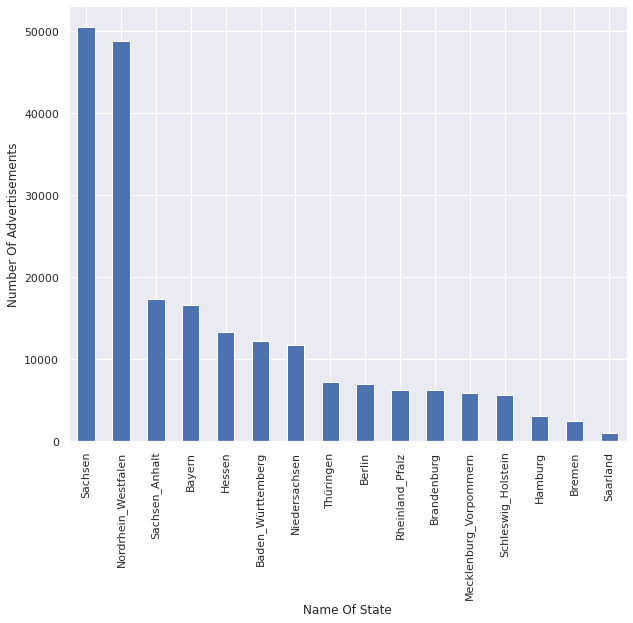

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
df['regio1'].value_counts().plot(kind='bar')
plt.ylabel("Number Of Advertisements")
plt.xlabel("Name Of State")

Text(0.5, 0, 'Type Of Flat')

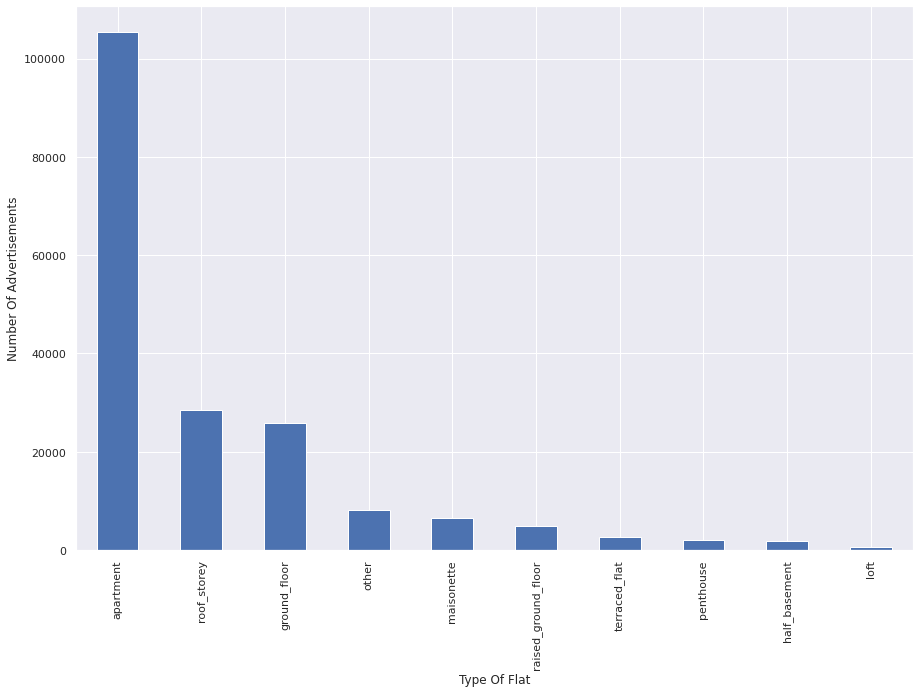

In [293]:
df['typeOfFlat'].value_counts().plot(kind='bar')
plt.ylabel("Number Of Advertisements")
plt.xlabel("Type Of Flat")

Text(0.5, 1.0, 'average total rent in different regions')

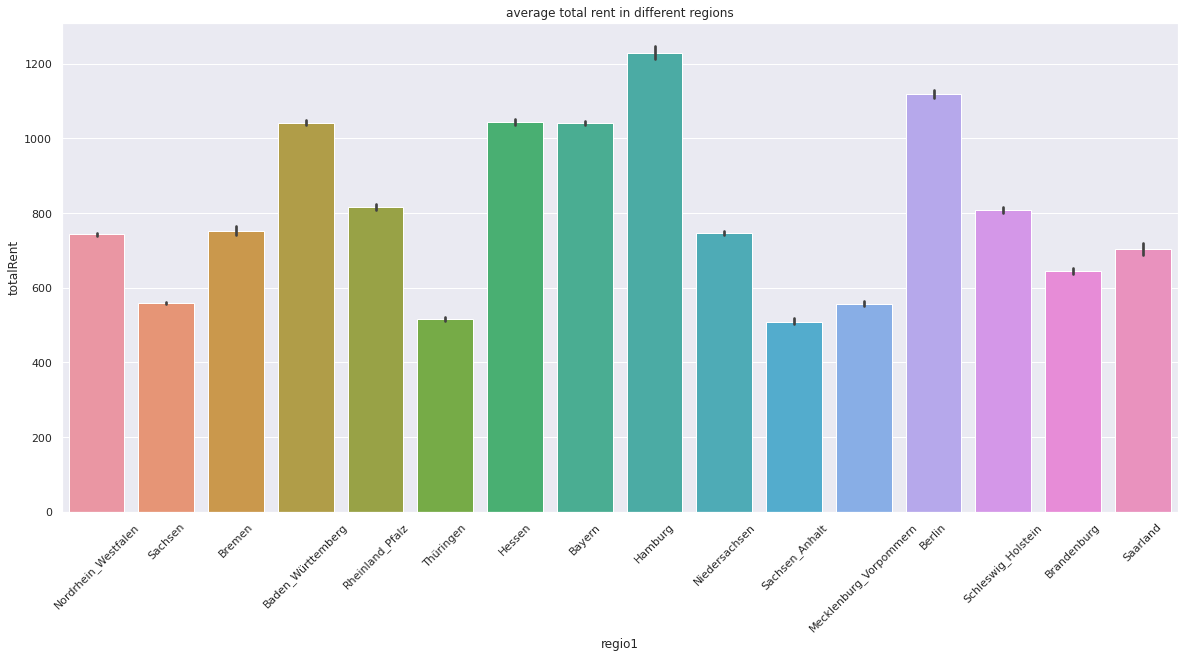

In [294]:
import seaborn as sns
sns.set(rc={'figure.figsize':(20,9)})
plt.xticks(rotation=45)
sns.barplot(x = df['regio1'],y=df['totalRent']).set_title('average total rent in different regions')

Text(0.5, 1.0, 'average base rent in different regions')

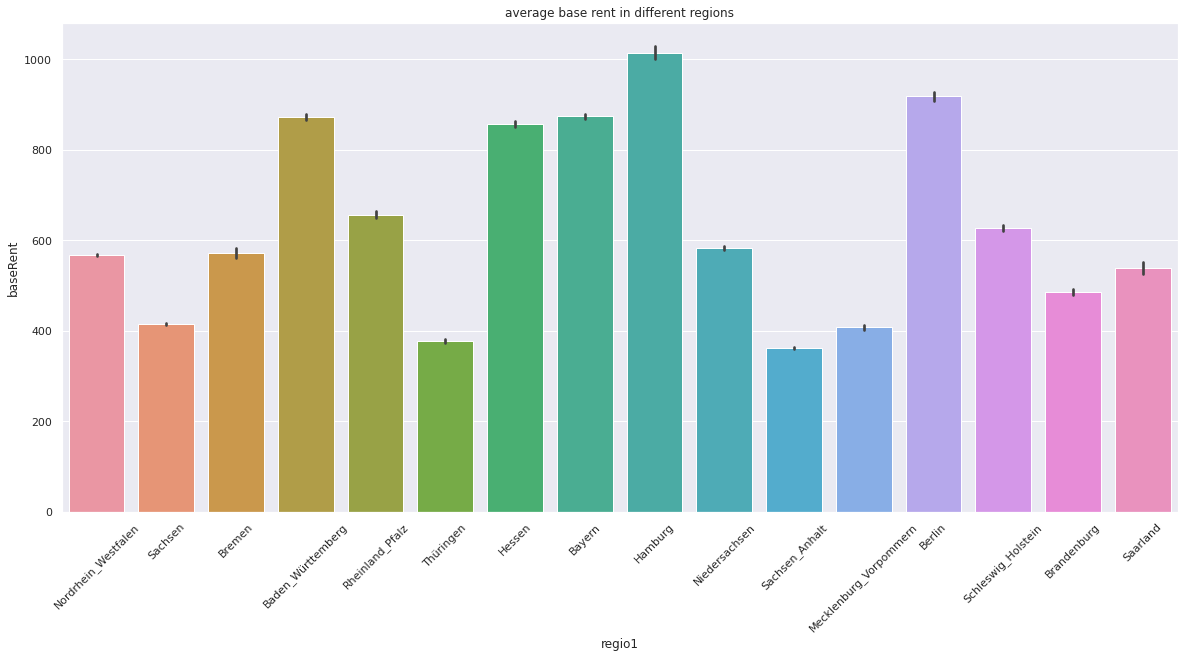

In [295]:
sns.set(rc={'figure.figsize':(20,9)})
plt.xticks(rotation=45)
sns.barplot(x = df['regio1'],y=df['baseRent']).set_title('average base rent in different regions')

Text(0.5, 1.0, 'average number of floors in different flat types')

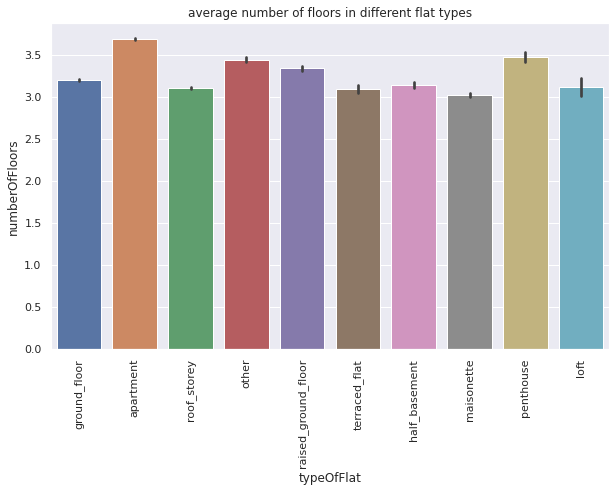

In [296]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation=90)
sns.barplot(x = df['typeOfFlat'],y=df['numberOfFloors']).set_title('average number of floors in different flat types')

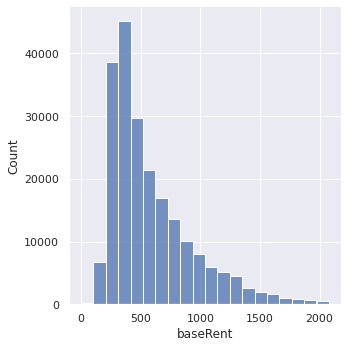

In [297]:
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(df["baseRent"], bins=20)

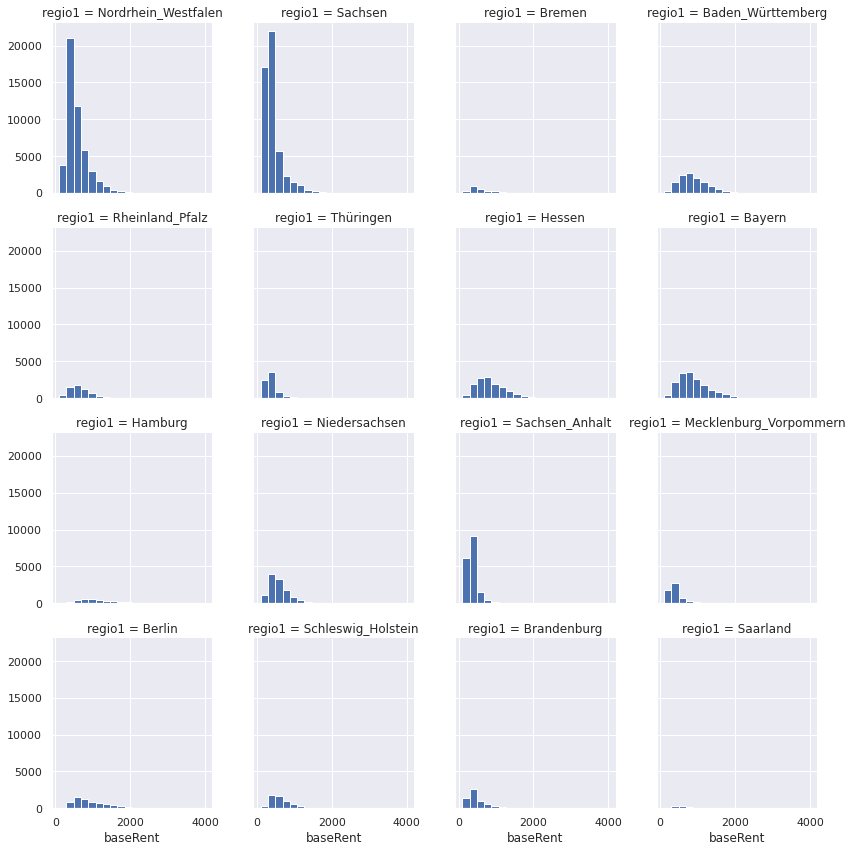

In [298]:
df['regio1'].value_counts()
g = sns.FacetGrid(df, col='regio1', col_wrap=4)
g = g.map(plt.hist, 'baseRent', bins=20, range=(100,4000))

Text(0.5, 1.0, 'average base rent in yearConstructedRange')

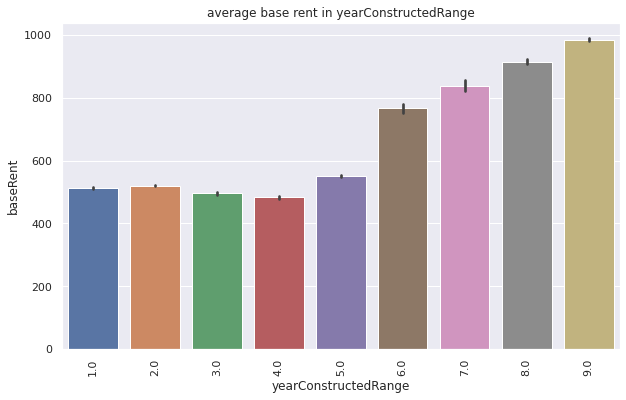

In [299]:
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation=90)
sns.barplot(x = df['yearConstructedRange'],y=df['baseRent']).set_title('average base rent in yearConstructedRange')

In [300]:
print (dfOriginal.groupby(by=['heatingType'], as_index=True)['heatingCosts'].mean())

heatingType
central_heating                   77.989390
combined_heat_and_power_plant     80.395761
district_heating                  75.897458
electric_heating                  88.533898
floor_heating                     86.167386
gas_heating                       76.109422
heat_pump                         68.027630
night_storage_heater              80.141632
oil_heating                       84.205099
self_contained_central_heating    63.217781
solar_heating                     74.089310
stove_heating                     66.363636
wood_pellet_heating               71.162768
Name: heatingCosts, dtype: float64


Text(0.5, 1.0, 'average heating cost of different heating types')

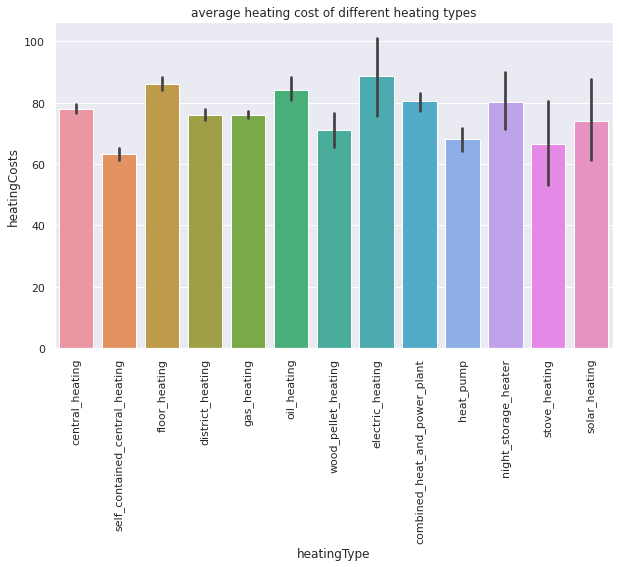

In [301]:
plt.xticks(rotation=90)
sns.barplot(x = dfOriginal['heatingType'],y=dfOriginal['heatingCosts']).set_title('average heating cost of different heating types')

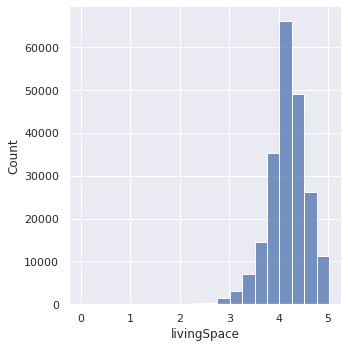

In [302]:
sns.set(rc={'figure.figsize':(15,10)})
sns.displot(np.log(df["livingSpace"]),kde_kws={"label": 'livingSpace'}, bins=20)

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215031 entries, 0 to 268848
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                215031 non-null  object 
 1   serviceCharge         215031 non-null  float64
 2   heatingType           180094 non-null  object 
 3   telekomTvOffer        189522 non-null  object 
 4   newlyConst            215031 non-null  bool   
 5   balcony               215031 non-null  bool   
 6   picturecount          215031 non-null  int64  
 7   pricetrend            215031 non-null  float64
 8   telekomUploadSpeed    215031 non-null  float64
 9   totalRent             215031 non-null  float64
 10  yearConstructed       215031 non-null  float64
 11  hasKitchen            215031 non-null  bool   
 12  geo_bln               215031 non-null  object 
 13  cellar                215031 non-null  bool   
 14  yearConstructedRange  215031 non-null  float64
 15  

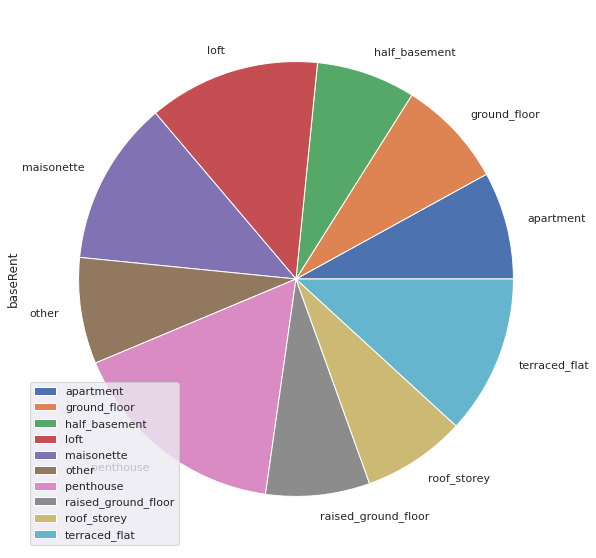

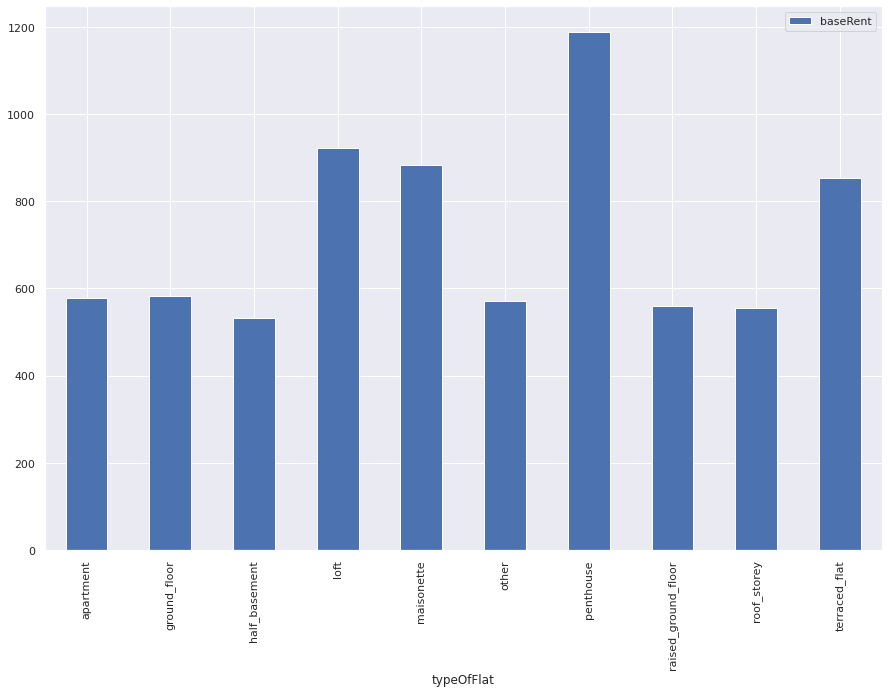

In [304]:
import plotly.express as px
grdsp = df.groupby(["typeOfFlat"])[["baseRent"]].mean().reset_index()
dfflat = pd.DataFrame(df[['typeOfFlat' , 'baseRent']])
dfflatrent = dfflat.groupby(['typeOfFlat']).mean()
y = np.array(dfflatrent['baseRent'])
dfflatrent.plot.pie(subplots=True)
dfflatrent.plot(kind='bar')


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215031 entries, 0 to 268848
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   regio1                215031 non-null  object 
 1   serviceCharge         215031 non-null  float64
 2   heatingType           180094 non-null  object 
 3   telekomTvOffer        189522 non-null  object 
 4   newlyConst            215031 non-null  bool   
 5   balcony               215031 non-null  bool   
 6   picturecount          215031 non-null  int64  
 7   pricetrend            215031 non-null  float64
 8   telekomUploadSpeed    215031 non-null  float64
 9   totalRent             215031 non-null  float64
 10  yearConstructed       215031 non-null  float64
 11  hasKitchen            215031 non-null  bool   
 12  geo_bln               215031 non-null  object 
 13  cellar                215031 non-null  bool   
 14  yearConstructedRange  215031 non-null  float64
 15  

# price prediction

In [306]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [307]:
from sklearn import preprocessing
df1 = df.select_dtypes(['number']) #drop non numerical columns   
df1 = pd.DataFrame(df1)

In [308]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df1 = pd.DataFrame(scale.fit_transform(df1.values), columns=df1.columns, index=df1.index)

In [309]:
df1.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,floor,numberOfFloors,noRoomsRange,livingSpaceRange
0,0.216814,0.206897,0.602349,0.230769,0.012978,0.691892,0.125,0.286333,0.566704,0.375,0.437910,0.461538,0.153846,0.142857,0.75,0.6
2,0.225664,0.275862,0.442953,0.035897,0.020093,0.983784,1.000,0.464389,0.552037,0.625,0.002471,0.307692,0.307692,0.190476,0.50,0.6
4,0.122124,0.655172,0.421141,0.715710,0.013952,0.610811,0.000,0.368142,0.559837,0.500,0.275967,0.307692,0.153846,0.166028,0.50,0.6
6,0.061947,0.310345,0.299497,0.035897,0.005862,0.654054,0.125,0.149182,0.406694,0.125,0.088223,0.153846,0.153846,0.190476,0.25,0.4
7,0.077876,0.172414,0.373322,0.035897,0.009022,0.659459,0.125,0.217637,0.395360,0.250,0.281050,0.307692,0.235765,0.166028,0.50,0.2


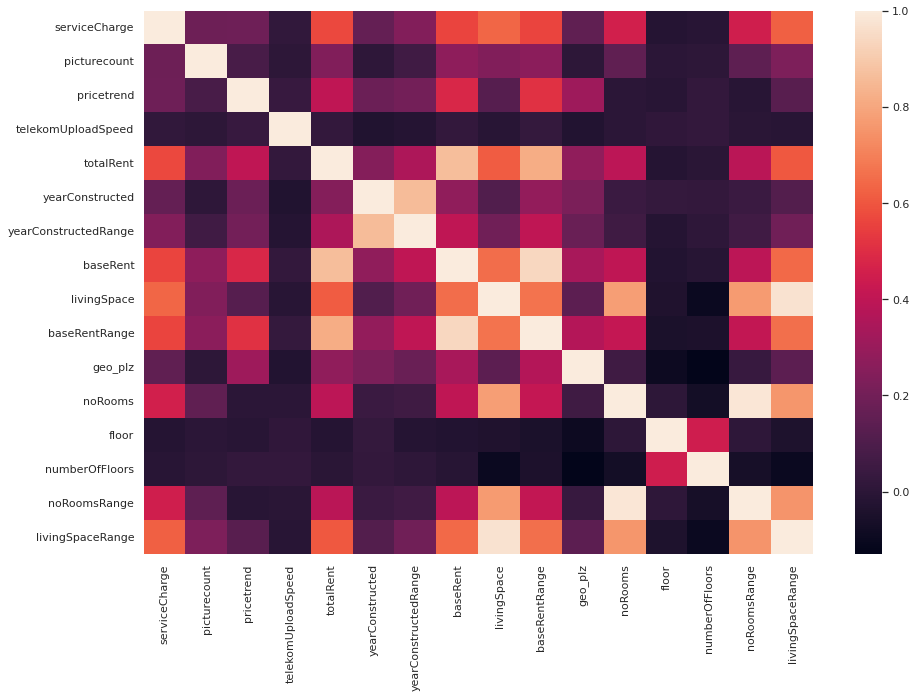

In [310]:
dfcorr = df1.corr()
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
ax = sns.heatmap(dfcorr)

In [311]:
df2 = df.select_dtypes(['object']) 
df2 = pd.DataFrame(df2)
df3 = pd.get_dummies(df2)
for col in df2.columns:
  df= df.drop(col,axis=1)
df = pd.concat([df, df3], axis=1)

In [312]:
df.replace({False: 0, True: 1}, inplace=True) #one-hot encoding the boolean values

In [313]:
df.head()

,serviceCharge,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,hasKitchen,cellar,...,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat
0,245.0,0,0,6,4.62,10.000000,840.00,1965.0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,255.0,1,1,8,2.72,2.400000,1300.00,2019.0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,138.0,0,1,19,2.46,28.912697,903.00,1950.0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,70.0,0,0,9,1.01,2.400000,380.00,1958.0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,88.0,0,1,5,1.89,2.400000,584.25,1959.0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [314]:
x = df.drop('totalRent',axis=1)
y = df['totalRent']

In [315]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [316]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
acc_dt= round(reg.score(X_test,y_test) * 100, 2)
print(acc_dt)

94.46


In [317]:
from sklearn.metrics import r2_score
pred = reg.predict(X_test)
r2_score(y_test, pred)*100

94.46479495080436

### multiprocessing

In [318]:
import multiprocessing as mp
from multiprocessing import Pool, cpu_count
df = dfOriginal.copy()

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

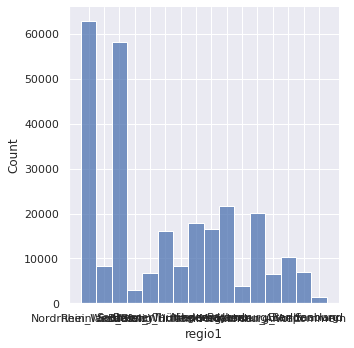

In [320]:
sns.displot(df["regio1"], bins=20)

In [321]:
def dataCleaning(dfa):
  dfa.dropna(subset=['totalRent'],inplace=True)
  dfa = dfa.drop(dfa[dfa['totalRent'] == 0.0].index)
  dfa = dfa.drop(dfa[dfa['totalRent'] < 0.0].index)
  dfa = dfa.drop(dfa[dfa['livingSpace'] == 0.0].index)
  dfa = dfa.drop(dfa[dfa['livingSpace'] < 0.0].index)
  dfa = dfa.drop(dfa[dfa['yearConstructed'] >2022].index)
  dfa = dfa.drop(dfa[dfa['baseRent'] < 0.0].index)
  dfa['condition'].fillna("Other", inplace=True)
  dfa.duplicated(keep='last')
  for col in dfa: ##deleting outliers
    if dfa[col].dtype in ("int", "float"):
        upper_range = dfa[col].mean() + 3 * dfa[col].std()
        lower_range = dfa[col].mean() - 3 * dfa[col].std()
        indexs = dfa[(dfa[col] > upper_range) | (dfa[col] < lower_range)].index
        dfa = dfa.drop(indexs)  
  for col in dfa:
    if dfa[col].dtype in ("int", "float"):
      dfa[col].fillna(dfa[col].mean(),inplace=True)          
  return dfa

In [322]:
gbos = df.groupby('regio1')
df.shape

(268850, 49)

In [323]:
s_time = time.time()
with Pool(cpu_count()) as p:
    res_list = list(p.imap(dataCleaning, [group for _, group in gbos]))
df_edit = pd.concat(res_list)    
print(f'run time : {time.time() - s_time}')

run time : 9.867691278457642


In [324]:
df_edit

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
8,Baden_Württemberg,110.000000,oil_heating,ONE_YEAR_FREE,10.0,False,False,5,3.77,40.000000,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",73.779832,E,2016.505148,90.76,0.195486,Feb20
21,Baden_Württemberg,0.000000,NaN,ONE_YEAR_FREE,10.0,False,False,13,5.63,40.000000,...,Stuttgart,Bad_Cannstatt,Helle 3-Zimmer-Wohnung mit Galerie in Bad Cann...,"Backofen, Badewanne, Bett 1,40x2m, Bettwäsche,...",73.779832,NaN,2016.505148,90.76,0.195486,Oct19
26,Baden_Württemberg,20.000000,NaN,ONE_YEAR_FREE,10.0,False,False,7,4.65,10.000000,...,Esslingen_Kreis,Nürtingen,Das im März 2014 komplett renovierte Doppelhau...,Ausstattung Zimmer: \nDie Zimmer sind keine Du...,73.779832,NaN,2016.505148,90.76,0.195486,Feb20
84,Baden_Württemberg,295.000000,floor_heating,NaN,10.0,False,True,2,6.46,27.485155,...,Böblingen_Kreis,Böblingen,NaN,NaN,73.779832,NaN,2016.505148,90.76,0.195486,Feb20
107,Baden_Württemberg,84.000000,central_heating,ONE_YEAR_FREE,10.0,False,True,10,5.10,40.000000,...,Baden_Baden,Innenstadt,Von den kernsanierten Wohnungen sind schon 50%...,Diese Wohnung zeichnet sich durch die seitlich...,73.000000,NaN,2019.000000,90.76,0.195486,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268590,Thüringen,170.000000,gas_heating,ONE_YEAR_FREE,10.0,False,True,8,2.19,40.000000,...,Gera,Gera_Ost,Das Objekt ist eingebettet in einen Gebäudekom...,Die Wohnung wurde komplett renoviert und ist i...,63.009431,NaN,2020.000000,90.76,0.201146,Feb20
268620,Thüringen,115.374612,NaN,ONE_YEAR_FREE,10.0,False,True,6,2.92,40.000000,...,Saale_Holzland_Kreis,Neuengönna,Charmantes 1 Zimmer Appartment mit Miniküche -...,NaN,63.009431,NaN,2008.002556,90.76,0.201146,Oct19
268661,Thüringen,295.050000,NaN,ONE_YEAR_FREE,10.0,False,True,3,1.79,2.400000,...,Unstrut_Hainich_Kreis,Mühlhausen/Thüringen,Großzügige 4-Raumwohnung mit Balkon. Die Wohnu...,NaN,63.009431,NaN,2008.002556,90.76,0.205500,Sep18
268711,Thüringen,115.374612,NaN,NaN,10.0,False,True,8,1.99,29.457525,...,Ilm_Kreis,Langewiesen,Die Appartementanlage ist 1995 neu errichtet w...,Das Appartement verfügt über ein Zimmer mit Ei...,63.009431,NaN,2008.002556,90.76,0.201146,Oct19


In [325]:
s_time = time.time()
res_list = list(map(dataCleaning, [group for _, group in gbos]))
df_edit = pd.concat(res_list)
print(f'run time : {time.time() - s_time}')

run time : 7.684042692184448


In [326]:
df_edit

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,...,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
8,Baden_Württemberg,110.000000,oil_heating,ONE_YEAR_FREE,10.0,False,False,5,3.77,40.000000,...,Emmendingen_Kreis,Denzlingen,"Diese ansprechende, lichtdurchflutete DG-Wohnu...","Parkett, Einbauküche, kein Balkon",73.779832,E,2016.505148,90.76,0.195486,Feb20
21,Baden_Württemberg,0.000000,NaN,ONE_YEAR_FREE,10.0,False,False,13,5.63,40.000000,...,Stuttgart,Bad_Cannstatt,Helle 3-Zimmer-Wohnung mit Galerie in Bad Cann...,"Backofen, Badewanne, Bett 1,40x2m, Bettwäsche,...",73.779832,NaN,2016.505148,90.76,0.195486,Oct19
26,Baden_Württemberg,20.000000,NaN,ONE_YEAR_FREE,10.0,False,False,7,4.65,10.000000,...,Esslingen_Kreis,Nürtingen,Das im März 2014 komplett renovierte Doppelhau...,Ausstattung Zimmer: \nDie Zimmer sind keine Du...,73.779832,NaN,2016.505148,90.76,0.195486,Feb20
84,Baden_Württemberg,295.000000,floor_heating,NaN,10.0,False,True,2,6.46,27.485155,...,Böblingen_Kreis,Böblingen,NaN,NaN,73.779832,NaN,2016.505148,90.76,0.195486,Feb20
107,Baden_Württemberg,84.000000,central_heating,ONE_YEAR_FREE,10.0,False,True,10,5.10,40.000000,...,Baden_Baden,Innenstadt,Von den kernsanierten Wohnungen sind schon 50%...,Diese Wohnung zeichnet sich durch die seitlich...,73.000000,NaN,2019.000000,90.76,0.195486,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268590,Thüringen,170.000000,gas_heating,ONE_YEAR_FREE,10.0,False,True,8,2.19,40.000000,...,Gera,Gera_Ost,Das Objekt ist eingebettet in einen Gebäudekom...,Die Wohnung wurde komplett renoviert und ist i...,63.009431,NaN,2020.000000,90.76,0.201146,Feb20
268620,Thüringen,115.374612,NaN,ONE_YEAR_FREE,10.0,False,True,6,2.92,40.000000,...,Saale_Holzland_Kreis,Neuengönna,Charmantes 1 Zimmer Appartment mit Miniküche -...,NaN,63.009431,NaN,2008.002556,90.76,0.201146,Oct19
268661,Thüringen,295.050000,NaN,ONE_YEAR_FREE,10.0,False,True,3,1.79,2.400000,...,Unstrut_Hainich_Kreis,Mühlhausen/Thüringen,Großzügige 4-Raumwohnung mit Balkon. Die Wohnu...,NaN,63.009431,NaN,2008.002556,90.76,0.205500,Sep18
268711,Thüringen,115.374612,NaN,NaN,10.0,False,True,8,1.99,29.457525,...,Ilm_Kreis,Langewiesen,Die Appartementanlage ist 1995 neu errichtet w...,Das Appartement verfügt über ein Zimmer mit Ei...,63.009431,NaN,2008.002556,90.76,0.201146,Oct19


## using dask and pyspark

In [327]:
!python -m pip install "dask[complete]"

In [328]:
df = dfOriginal.copy()

In [329]:
import dask
import dask.dataframe as dd

In [330]:
ddf = dd.from_pandas(df, npartitions=2)

In [331]:
ddf.partitions[0]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,object,float64,object,object,float64,bool,bool,int64,float64,float64,float64,float64,int64,float64,object,bool,object,bool,float64,float64,object,float64,object,object,object,object,object,object,bool,int64,object,int64,float64,float64,float64,float64,int64,bool,int64,object,object,object,object,float64,object,float64,float64,float64,object
134425,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [332]:
ddf.partitions[1]

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
134425,object,float64,object,object,float64,bool,bool,int64,float64,float64,float64,float64,int64,float64,object,bool,object,bool,float64,float64,object,float64,object,object,object,object,object,object,bool,int64,object,int64,float64,float64,float64,float64,int64,bool,int64,object,object,object,object,float64,object,float64,float64,float64,object
268849,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [333]:
dpdf = ddf.compute()
type(dpdf)

pandas.core.frame.DataFrame

In [334]:
s_time = time.time()
# ddf_edit = ddf.groupby('col3').apply(my_func)
gbos = ddf.groupby('regio1')
ddf_edit = gbos.apply(dataCleaning, meta = {'regio1':'object',	'serviceCharge':'float64',	'heatingType':'object',	'telekomTvOffer':'object',
                                            'telekomHybridUploadSpeed':'float64',	'newlyConst':'bool',	'balcony':'bool',	'picturecount':'int64',
                                            'pricetrend':'float64',	'telekomUploadSpeed':'float64',	'totalRent':'float64','yearConstructed':'float64',
                                            'scoutId':'float64',	'noParkSpaces':'int64',	'firingTypes':'float64',	'hasKitchen':'object',
                                            'geo_bln':'bool',	'cellar':'object',	'yearConstructedRange':'bool',	'baseRent':'float64',	'houseNumber':'object',
                                            'livingSpace':'float64',	'geo_krs':'object',	'condition':'object',	'interiorQual':'object',	'petsAllowed':'object',
                                            'street':'object',	'streetPlain':'object',	'lift':'bool',	'baseRentRange':'int64',	'typeOfFlat':'object',
                                            'geo_plz':'int64',	'noRooms':'float64',	'thermalChar':'float64',	'floor':'float64'	,'numberOfFloors':'float64',
                                            'noRoomsRange':'int64',	'garden':'bool',	'livingSpaceRange':'int64',	'regio2':'object','regio3':'object',
                                            'description':'object',	'facilities':'object',	'heatingCosts':'float64',	'energyEfficiencyClass':'object',
                                            'lastRefurbish':'float64',	'electricityBasePrice':'float64',	'electricityKwhPrice':'float64',	'date':'object'})

print(f'run time : {time.time() - s_time}')

run time : 0.04126858711242676


### pyspark

In [335]:
import os, sys
sys.executable

'/usr/bin/python3'

In [336]:
#os.environ["SPARK_HOME"] = "/opt/spark-3.0.1-bin-hadoop2.7"
os.environ["PYSPARK_PYTHON"] = sys.executable

In [337]:
!pip install pyspark

In [338]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .getOrCreate()

In [339]:
df1 = df.select_dtypes(['number']) #drop non numerical columns   
df1 = pd.DataFrame(df1)
df1['regio1']=df['regio1']
# df1.info()
sdf=spark.createDataFrame(df1)

In [340]:
from pyspark.sql.functions import PandasUDFType
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, FloatType

In [341]:
schema = StructType([StructField('serviceCharge',FloatType(), True),
                     StructField(	'picturecount', IntegerType(), True), 
                     StructField(	'noParkSpaces', IntegerType(), True),
                     StructField(	'geo_plz', IntegerType(), True),
                     StructField(	'livingSpaceRange', IntegerType(), True),
                     StructField(	'noRoomsRange', IntegerType(), True),
                     StructField('telekomHybridUploadSpeed', FloatType(), True),
                     StructField('pricetrend', FloatType(), True),
                     StructField('telekomUploadSpeed', FloatType(), True),
                     StructField('totalRent', FloatType(), True),
                     StructField('yearConstructed', FloatType(), True),
                     StructField( 'scoutId', FloatType(), True),
                     StructField('firingTypes', FloatType(), True),
                     StructField('baseRent', FloatType(), True),
                     StructField('livingSpace', FloatType(), True),
                     StructField('baseRentRange', FloatType(), True),
                     StructField('noRooms', FloatType(), True),
                     StructField('thermalChar', FloatType(), True),
                     StructField('floor', FloatType(), True),
                     StructField('numberOfFloors', FloatType(), True),
                     StructField(	'heatingCosts', FloatType(), True),
                     StructField('lastRefurbish', FloatType(), True),
                     StructField('electricityBasePrice', FloatType(), True),
                     StructField('electricityKwhPrice', FloatType(), True),
                     StructField('regio1', StringType(), True)])

In [342]:
@pandas_udf(schema, functionType=PandasUDFType.GROUPED_MAP)
def dataCleaning(dfa):
  dfa.dropna(subset=['totalRent'],inplace=True)
  dfa = dfa.drop(dfa[dfa['totalRent'] == 0.0].index)
  dfa = dfa.drop(dfa[dfa['totalRent'] < 0.0].index)
  dfa = dfa.drop(dfa[dfa['livingSpace'] == 0.0].index)
  dfa = dfa.drop(dfa[dfa['livingSpace'] < 0.0].index)
  dfa = dfa.drop(dfa[dfa['yearConstructed'] >2022].index)
  dfa = dfa.drop(dfa[dfa['baseRent'] < 0.0].index)
  dfa.duplicated(keep='last')
  for col in dfa: ##deleting outliers
    if dfa[col].dtype in ("int", "float"):
        upper_range = dfa[col].mean() + 3 * dfa[col].std()
        lower_range = dfa[col].mean() - 3 * dfa[col].std()
        indexs = dfa[(dfa[col] > upper_range) | (dfa[col] < lower_range)].index
        dfa = dfa.drop(indexs)  
  for col in dfa:
    if dfa[col].dtype in ("int", "float"):
      dfa[col].fillna(dfa[col].mean(),inplace=True)          
  return dfa

In [343]:
s_time = time.time()
df_edit = sdf.groupby('regio1').apply(dataCleaning)
print(f'run time : {time.time() - s_time}')

run time : 0.1358046531677246


/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/group_ops.py:84: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  "more details.", UserWarning)
